# **FEATURE ENGINEERING**

**Import Basic Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

**Import .CSV Dataset**

In [0]:
df_csv = pd.read_csv("dataset_model.csv",sep=",")

**Reading Columns In Dataset**

In [81]:
df_csv.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Reading Top Head Values**

In [82]:
df_csv.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df_csv.shape

(614, 12)

In [22]:
df_csv['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

# **ASSINGMENT 3 - FEATURE ENGINEERING**

**Problem 1.1 - Idenitfy & Remove the field that is providing only unique information about records .Capture it in another dataframe**

**All The Fields Seems To Have Non-Unique Values In Other Columns Except For Loan_StatusFirst**

**So, First Checking If Loan ID has All Unique Values Or Not Actually**

In [8]:
len(df_csv['Loan_ID'].unique())

614

**As Loan_ID Contains All Unique Values, Capturing It In Another Dataframe & Then Removing That Field From Original Dataframe**

In [83]:
df_unqid = df_csv['Loan_ID']
df_csv=df_csv.drop(columns='Loan_ID')
df_csv.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Problem 1.2 - Identifying Continous & Categorical Columns**

**Categorical Variables:-**

In [16]:
df_csv['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [17]:
df_csv['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [256]:
df_csv['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
df_csv['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df_csv['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df_csv['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df_csv['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [0]:
cat_var1=list(set(df_csv.columns) - set(con_var))
cat_var=[]
for i in cat_var:
  print(i, "\t", len(df_csv[i].unique()))

In [57]:
print(cat_var1)

['Loan_Status', 'Married', 'Gender', 'Self_Employed', 'Education', 'Property_Area', 'Dependents']


**So Total Categorical Variables Are Gender, Married, Education, Self_Employed, Property_Area & Loan_Status**

**Continuous Variables:-**

In [28]:
len(df_csv['ApplicantIncome'].unique())

505

In [29]:
len(df_csv['CoapplicantIncome'].unique())

287

In [30]:
len(df_csv['LoanAmount'].unique())

204

In [31]:
len(df_csv['Loan_Amount_Term'].unique())

11

In [32]:
len(df_csv['Credit_History'].unique())

3

In [85]:
con_var = df_csv._get_numeric_data().columns
con_var

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

**So, Total Continuous Variables Are ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History**


**Problem 1.3 - Performing Uni-variate Analysis with Plots.Record your Observations**

**Univariate Analysis On Continuous Variables:-**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb37161080>,
      dtype=object)

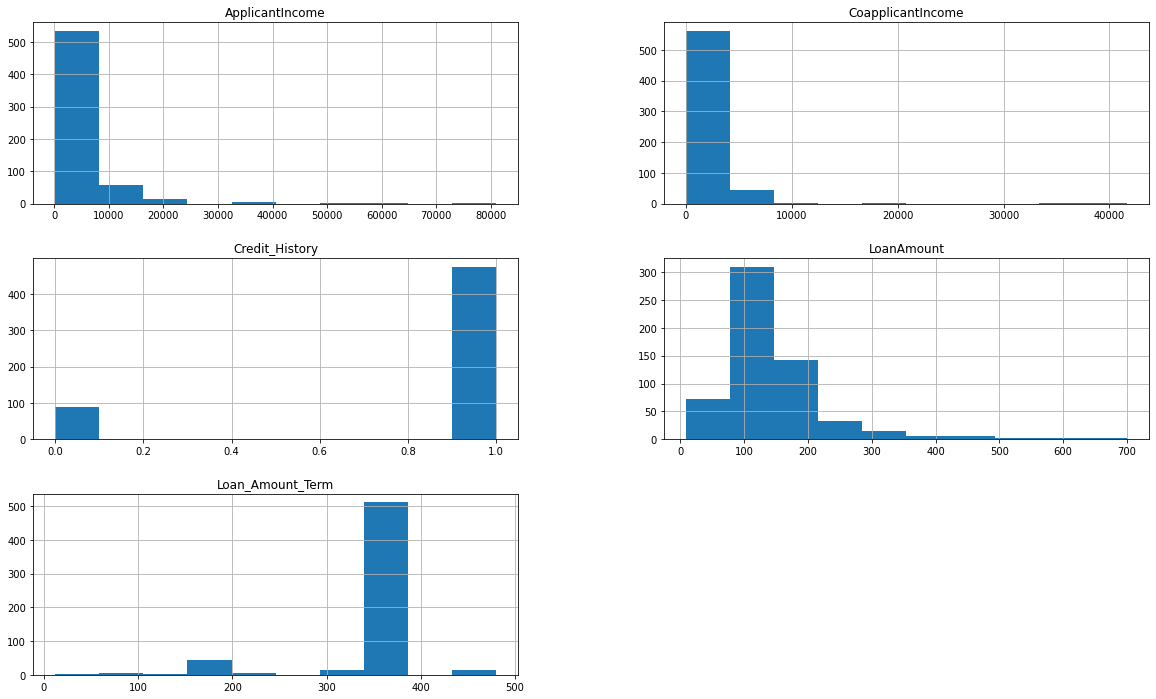

In [33]:
df_csv.hist(figsize=[20,12])

**Inferences From Above Graph:-**
1. More then 500 applicants earns an income of less than 10,000
2. Around 50 applicants earns an income of more than 10,000 & Around 20 applicants earns an income ranging between 15,000 to 25,0000
3. The income of Coapplicants is almost matched with the income of applicants
4. Credit History of around 90 applicants is ranging between 0.0 to 0.1 & of around 400+ applicants is ranging from 0.9 to 1.0
5. Loan amount of majority of applicants are ranging between 10 to 220, with the maximum of 90 to 140 for 300+ applicants in between
6. The maximum Loan amount term is in between 350 to 380 for around 510 applicants 

**Univariate Analysis On Categorical Variables:-**

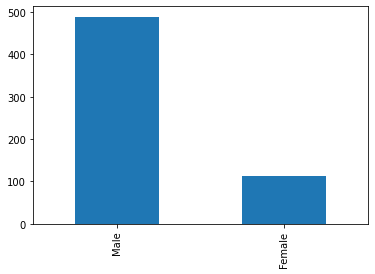

In [34]:
df_csv['Gender'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are more number of male applicants as compare to the females

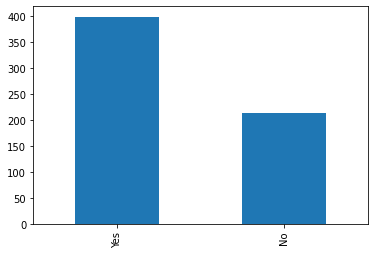

In [35]:
df_csv['Married'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are majority of applicants (around 400) married

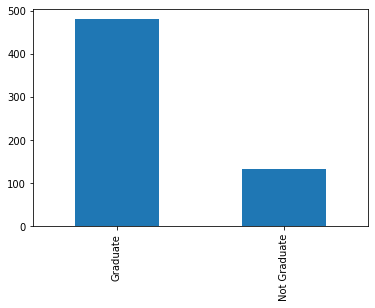

In [36]:
df_csv['Education'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are applicants more number of graduates(around 500) as compared to under-graduates

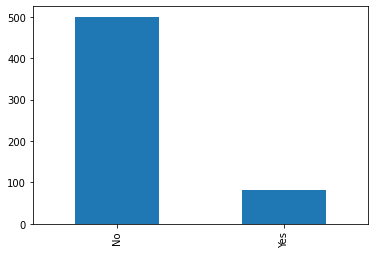

In [37]:
df_csv['Self_Employed'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are majority of peoples who are not self employed(around 500)

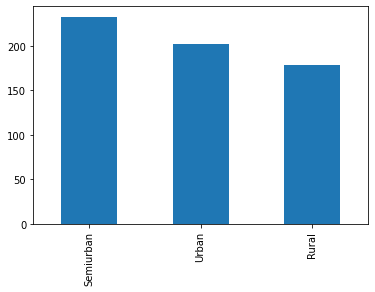

In [39]:
df_csv['Property_Area'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- The maximum property area is occupied by the Semiurban, second best is Urban & then least in Rural area 

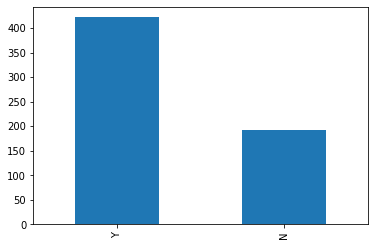

In [42]:
df_csv['Loan_Status'].value_counts().plot.bar()

**Inferences From Above Graph:-**
- There are majority of applicants whose loan status is accepted (around 410)

**Problem 1.4 - Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations**

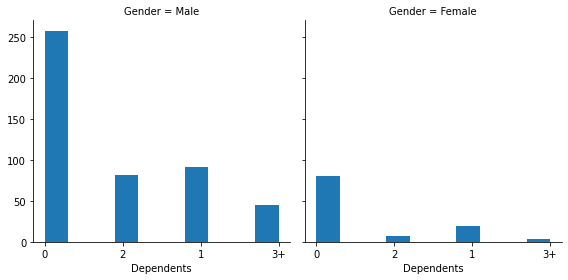

In [322]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'Dependents')

**Inferences From Above Graph:-**
- There are more male dependents as compared to the female dependents

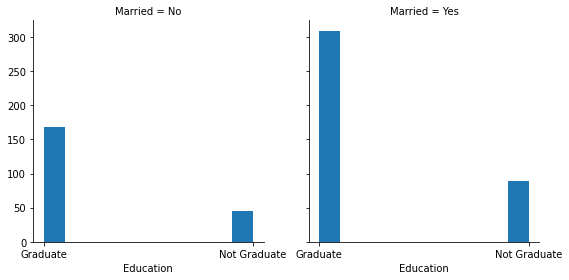

In [323]:
fn = sns.FacetGrid(df_csv,col='Married',height=4,aspect=1)
fn = fn.map(plt.hist,'Education')

**Inferences From Above Graph:-**
1. The people who are married seems to be graduated
2. The people who are not married also seems to be graduated if we compare them with under-graduats but there are more people who are graduated & married as compared to people who are graduated & non-married

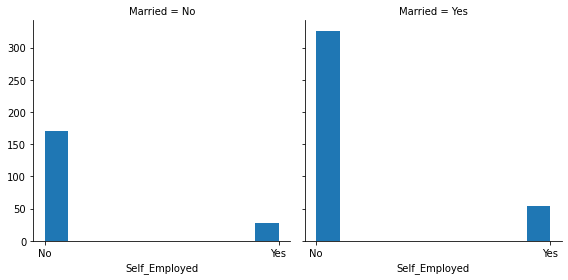

In [324]:
fn = sns.FacetGrid(df_csv,col='Married',height=4,aspect=1)
fn = fn.map(plt.hist,'Self_Employed')

**Inferences From Above Graph:-**
- There are more married people who are self-employed as compared to the non-married people who are self-employed

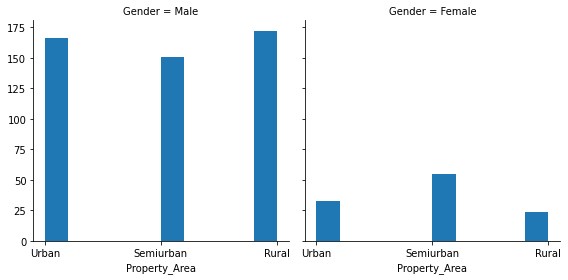

In [325]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'Property_Area')

**Inferences From Above Graph:-**
1. The males have more property in rural area & least in semiurban area
2. The females have more property in semiurban area & least in rural area

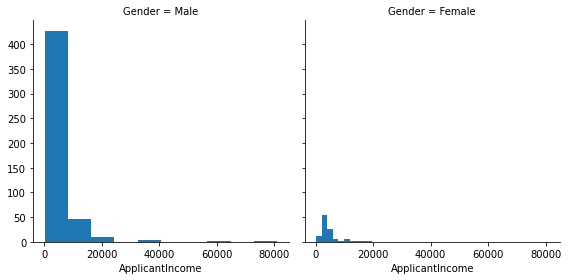

In [326]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'ApplicantIncome')

**Inferences From Above Graph:-**
- The income of male applicants is hugely more then the income of female applicants

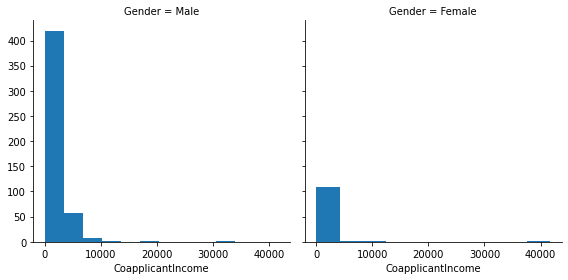

In [327]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'CoapplicantIncome')

**Inferences From Above Graph:-**
- Similarly, the income of male coapplicants are more as compared to the female coapplicants

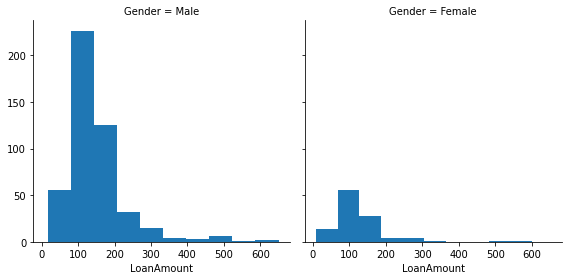

In [330]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'LoanAmount')

**Inferences From Above Graph:-**
- The loan amount of majority of males is also more then the loan amount of females

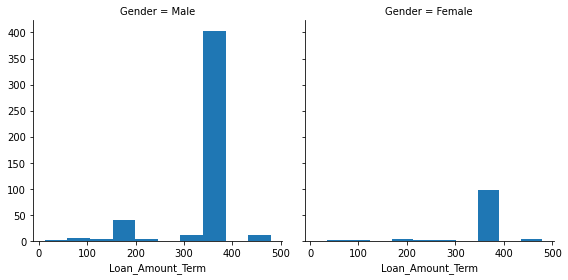

In [329]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Amount_Term')

**Inferences From Above Graph:-**
- The loan amount term of 350 to 400 males are more then the loan amount term of 350 to 400 females

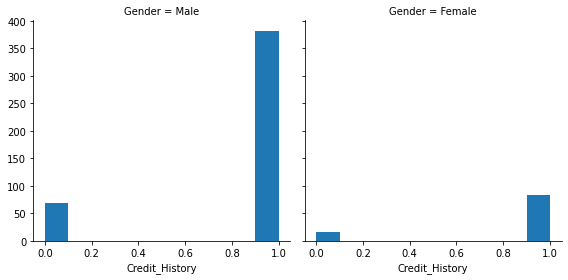

In [331]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'Credit_History')

**Inferences From Above Graph:-**
- The credit history of males is also more then the credit history of females

**Problem 1.5 - Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc**

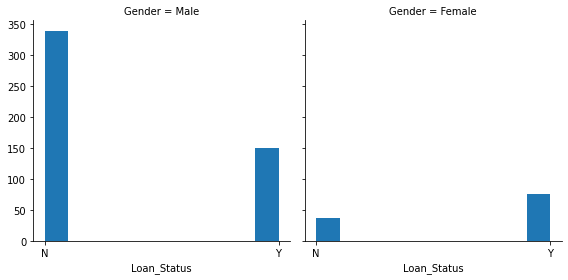

In [47]:
fn = sns.FacetGrid(df_csv,col='Gender',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
1. The loan status of around 340 males is accepted & around 150 males is rejected
2. The loan status of around 70 females is accepted & around 40 females is rejected

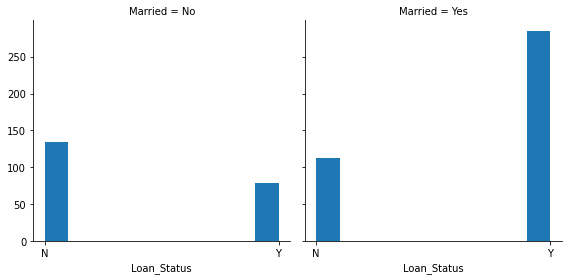

In [52]:
fn = sns.FacetGrid(df_csv,col='Married',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
- The loan status of married people is more as compared to the loan status of non-married people

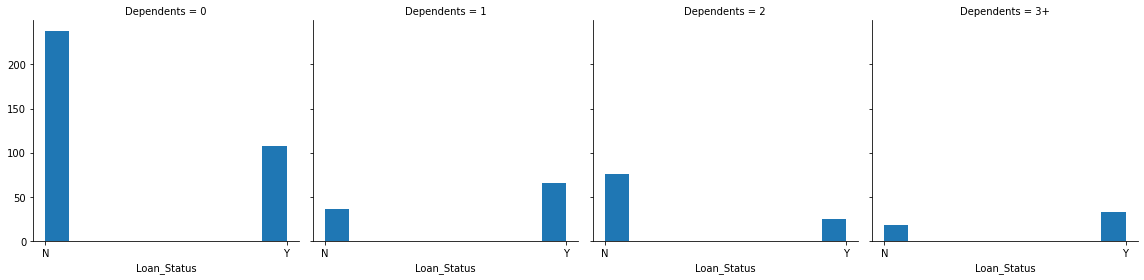

In [53]:
fn = sns.FacetGrid(df_csv,col='Dependents',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
1. The loan status of majority of those with dependents paramter as 0 is rejected
2. The loan status of majority of those with dependents paramter as 1 is accepted
3. The loan status of majority of thise with dependents parameter as 2 is rejected
4.The loan status of majority of those with dependents paramater more then 3 is accepted

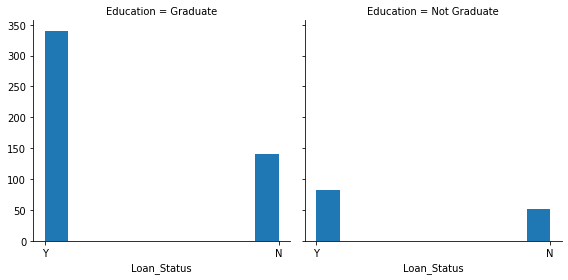

In [48]:
fn = sns.FacetGrid(df_csv,col='Education',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
- The loan status of graduated applicants is highly accepted as compare to the applicants who are not graduated

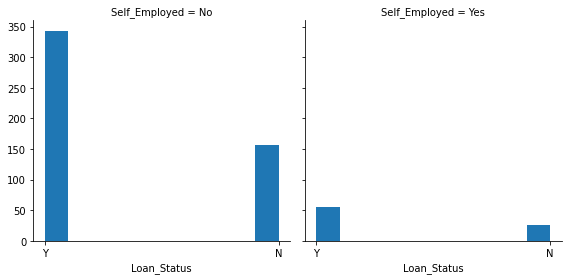

In [49]:
fn = sns.FacetGrid(df_csv,col='Self_Employed',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
- The loan status of applicants who are self-employed is less as compared to the applicants who are not self-employed

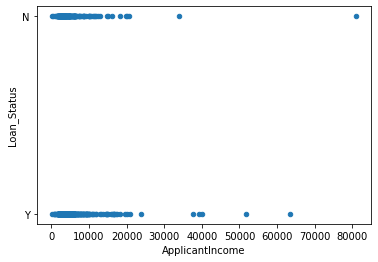

In [7]:
df_csv.plot.scatter(x='ApplicantIncome', y='Loan_Status')

**Inferences From Above Graph:-**
- The applicants income with loan status as rejected is more as compared to the accepted ones 

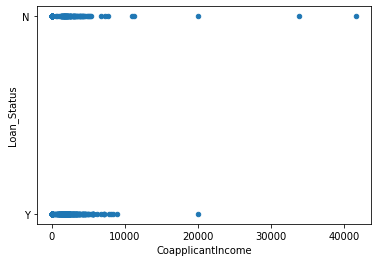

In [8]:
df_csv.plot.scatter(x='CoapplicantIncome', y='Loan_Status')

**Inferences From Above Graph:-**
- Same Observation is recorded in the coapplicants income also

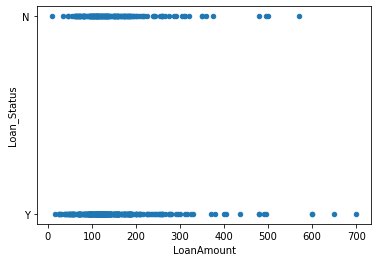

In [9]:
df_csv.plot.scatter(x='LoanAmount', y='Loan_Status')

**Inferences From Above Graph:-**
- The loan amount is more for the applicants whose loan status is accepted as usual

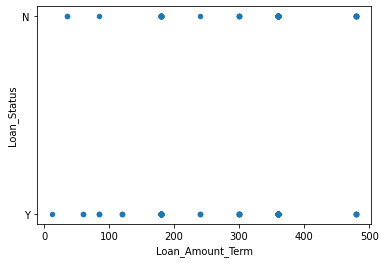

In [10]:
df_csv.plot.scatter(x='Loan_Amount_Term', y='Loan_Status')

**Inferences From Above Graph:-**
- The loan amount term for both type of loan status applicants is almost same

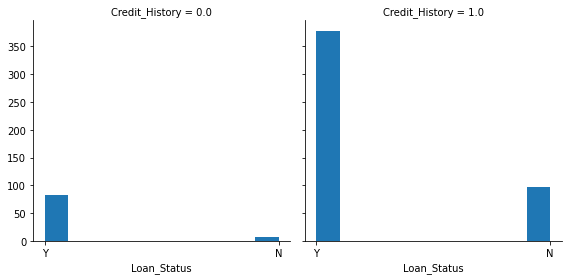

In [6]:
fn = sns.FacetGrid(df_csv,col='Credit_History',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
- The applicants whose Credit history is 1 have more recorded more loan acceptance as compared to the ones which has credit history as 0

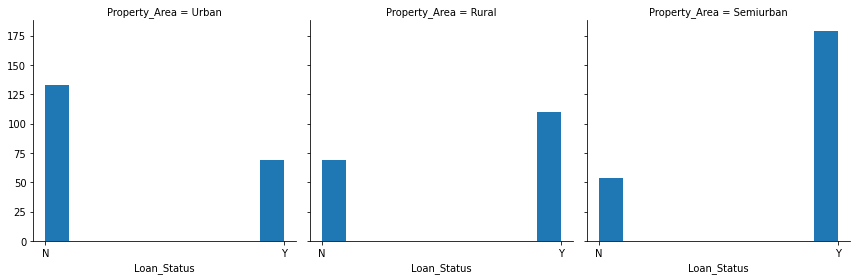

In [51]:
fn = sns.FacetGrid(df_csv,col='Property_Area',height=4,aspect=1)
fn = fn.map(plt.hist,'Loan_Status')

**Inferences From Above Graph:-**
1. The loan status for urban area recorded more rejectance 
2. The loan status for rural area recorded more acceptance
3. The loan status for semi urban area recorded maximum number of loan acceptance

**Problem 1.6 - How is the class distribution (Y/N) in Label(Target) Variable ?**

In [18]:
df_csv['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

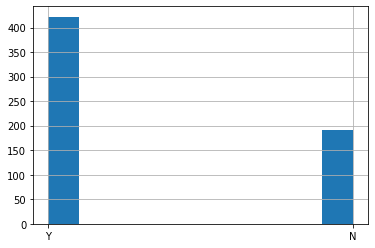

In [22]:
df_csv['Loan_Status'].hist()

**Problem 1.7 - Identify the Independent Variables that have missing values.**

In [86]:
df_csv.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
df_csv.isnull().sum().sum()

149

In [88]:
for col in df_csv.columns:
    pct_missing = np.mean(df_csv[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


**Problem 1.8 - Handle missing values appropriately , explain the technique applied for each case**

**Handle Missing Values Using Fillna & Replace It With 0:-**

In [0]:
df_csv['LoanAmount']=df_csv['LoanAmount'].fillna(0)
for k in df_csv['LoanAmount']:
    print(k)

**Handle Missing Values Using Fillna & Replace It With Median:-**

In [0]:
df_csv['Credit_History']=df_csv['Credit_History'].fillna(df_csv['Credit_History'].median())
for k in df_csv['Credit_History']:
  print(k)

In [0]:
df_csv['Loan_Amount_Term']=df_csv['Loan_Amount_Term'].fillna(df_csv['Loan_Amount_Term'].median())
for k in df_csv['Loan_Amount_Term']:
  print(k)

**Handle Missing Values Using fillna & Replace It Using bfill(Next Occuring Value):-**

In [0]:
df_csv['Gender']=df_csv['Gender'].fillna(method='bfill')
for k in df_csv['Gender']:
  print(k)

In [0]:
df_csv['Married']=df_csv['Married'].fillna(method='bfill')
for k in df_csv['Married']:
  print(k)

In [0]:
df_csv['Dependents']=df_csv['Dependents'].fillna(method='bfill')
for k in df_csv['Dependents']:
  print(k)

In [0]:
df_csv['Self_Employed']=df_csv['Self_Employed'].fillna(method='bfill')
for k in df_csv['Self_Employed']:
  print(k)

In [106]:
df_csv.isnull().sum().sum()

0

**Problem 1.9 - Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)**

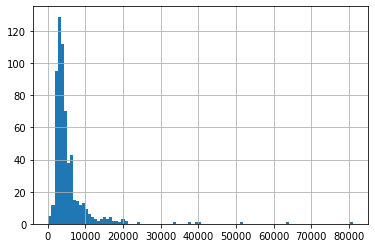

In [133]:
df['ApplicantIncome'].hist(bins=100)

**Here, In ApplicantIncome -> Outliers & Its Data In Each Field Is Given As:-**

In [134]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

**Here, In CoapplicantIncome -> Outliers & Its Data In Each Field Is Given As:-**

In [136]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

**Here, In LoanAmount -> Outliers & Its Data In Each Field Is Given As:-**

In [137]:
df['LoanAmount'].describe()

count    614.000000
mean     141.166124
std       88.340630
min        0.000000
25%       98.000000
50%      125.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

**Here, In Loan_Amount_Term -> Outliers & Its Data In Each Field Is Given As:-**

In [138]:
df['Loan_Amount_Term'].describe()

count    614.000000
mean     334.201954
std       82.183884
min        0.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

**Here, In Credit_History -> Outliers & Its Data In Each Field Is Given As:-**

In [139]:
df['Credit_History'].describe()

count    614.000000
mean       0.773616
std        0.418832
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

**Problem 1.10 - Use Box-Plot chart to represent the Outliers for each Independent Variable** *italicized text*

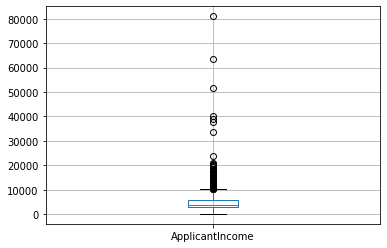

In [140]:
df.boxplot(column=['ApplicantIncome'])

**ApplicantIncome Have Slightly 5 Clearly Visible Outliers**

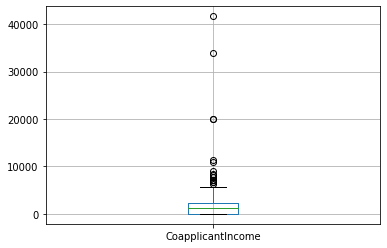

In [141]:
df.boxplot(column=['CoapplicantIncome'])

**CoapplicantIncome Have Slightly 3 Clearly Visible Outliers**

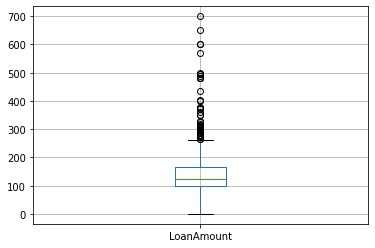

In [142]:
df.boxplot(column=['LoanAmount'])

**ApplicantIncome Have Slightly 6 Clearly Visible Outliers & Also It Has Maximum Number Of Outliers As Compared To All Other Independent Variables**

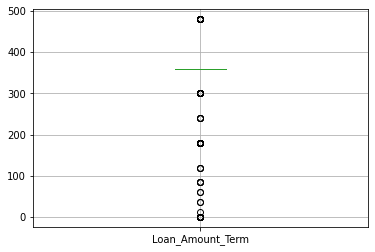

In [143]:
df.boxplot(column=['Loan_Amount_Term'])

**Loan_Amount_Term Has Only 1 Clearly Visible Outlier**

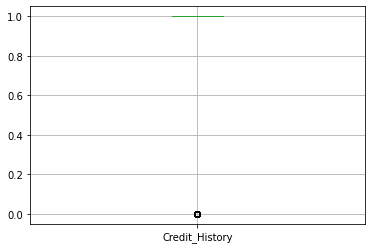

In [144]:
df.boxplot(column=['Credit_History'])

**Credit_History Have No Outliers i.e. 0**

**Problem 1.11 - Perform treatment of these Outliers using appropriate techniqies.Explain your approach**

**Outlier Treatment Using IQR(Inter-Quartile Range) Score:-**

In [339]:
Q1=df_csv.quantile(0.1)
Q3=df_csv.quantile(0.9)
IQR=Q3-Q1
df_remove = ((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).sum()
df_remove

ApplicantIncome      10
CoapplicantIncome     6
Credit_History        0
Dependents            0
Education             0
Gender                0
LoanAmount           11
Loan_Amount_Term     70
Loan_Status           0
Married               0
Property_Area         0
Self_Employed         0
dtype: int64

In [342]:
df_qua=df_csv[~((df_csv < (Q1 - 1.5 * IQR)) |(df_csv > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_csv.shape)
print(df_qua.shape)

(612, 12)
(524, 12)


**Problem 2 - Perform Label Encoding on Target Variable (Loan_Status).**

In [0]:
df_enc = df_csv.copy()

In [16]:
le = LabelEncoder()
df_enc['enc_Loan_Status'] = le.fit_transform(df_enc['Loan_Status'])
df_enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


**Problem 3.1 - Perform Label Encoding on Categorical Independent Variables.**

In [0]:
df_enc=df_csv.copy()
for j in cat_var1:
  df_enc['enc_'+str(j)] = le.fit_transform(df_enc[j])

**Problem 3.2 - What is the shape of dataframe post Categorical Encoding ?**

In [37]:
df_enc.shape

(614, 19)

In [38]:
print(cat_var1)

['Loan_Status', 'Married', 'Gender', 'Self_Employed', 'Education', 'Property_Area', 'Dependents']


In [39]:
df_enc.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,enc_Loan_Status,enc_Married,enc_Gender,enc_Self_Employed,enc_Education,enc_Property_Area,enc_Dependents
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0,1,0,0,2,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,1,0,0,0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0,2,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,1,2,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,0,0,2,0


**Problem 3.3 - Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [40]:
corr = df_enc.corr()
corr.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,enc_Loan_Status,enc_Married,enc_Gender,enc_Self_Employed,enc_Education,enc_Property_Area,enc_Dependents
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710,0.049052,0.046230,0.122728,-0.140760,-0.009500,0.115036
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187,0.077760,0.086991,-0.021807,-0.062290,0.010522,0.026683
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214,0.147108,0.097577,0.111754,-0.168759,-0.046632,0.158914
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549,-0.095364,-0.075813,-0.027941,-0.073928,-0.076120,-0.087210
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556,0.009519,0.005658,0.006209,-0.073658,0.001963,-0.065459
enc_Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000,0.089072,0.012213,0.009035,-0.085884,0.032112,-0.003361
enc_Married,0.049052,0.077760,0.147108,-0.095364,0.009519,0.089072,1.000000,0.371532,-0.000257,0.014097,0.004415,0.333841
enc_Gender,0.046230,0.086991,0.097577,-0.075813,0.005658,0.012213,0.371532,1.000000,0.011676,0.049480,-0.019854,0.164475
enc_Self_Employed,0.122728,-0.021807,0.111754,-0.027941,0.006209,0.009035,-0.000257,0.011676,1.000000,-0.008734,-0.037106,0.044505
enc_Education,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.085884,0.014097,0.049480,-0.008734,1.000000,-0.065243,0.054909


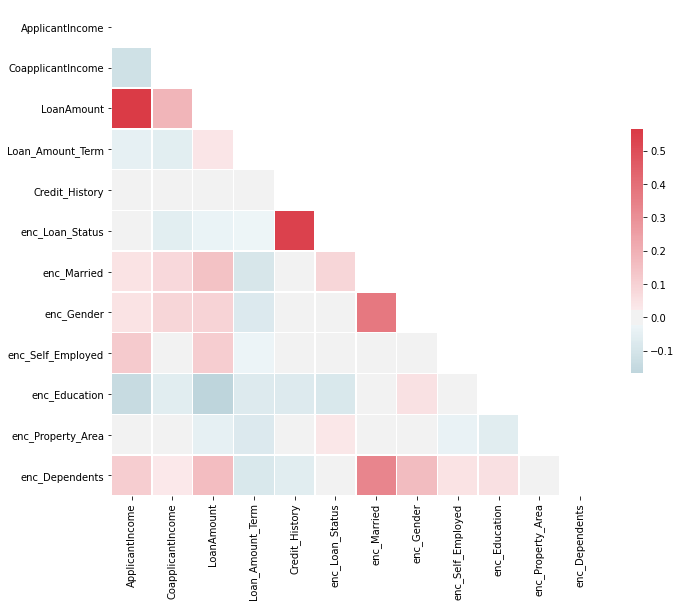

In [41]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Problem 3.4 - Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)**

**Variables That Have Strong Correlations Are:-**
- (LoanAmount , ApplicationIncome)
- (Credit_History , Loan_Status)
- (Gender , Married)

**Problem 4.1 - Perform One Hot Encoding on Categorical Independent Variables.**

In [42]:
ohe = OneHotEncoder(handle_unknown='ignore')
df_ohe=df_csv.copy()
df_ohe.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
df_ohe.shape

(614, 12)

In [0]:
for i in cat_var1:
  enc_rel = pd.DataFrame(ohe.fit_transform(df_ohe[[i]]).toarray())
  enc_rel = enc_rel.add_prefix(i+'_')
  df_ohe = df_ohe.join(enc_rel)
  df_ohe = df_ohe.drop(i,axis=1)

In [45]:
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_0,Loan_Status_1,Married_0,Married_1,Gender_0,Gender_1,Self_Employed_0,Self_Employed_1,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2,Dependents_0,Dependents_1,Dependents_2,Dependents_3
0,5849,0.0,128.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,4583,1508.0,128.0,360.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3000,0.0,66.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2583,2358.0,120.0,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,6000,0.0,141.0,360.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


**Problem 4.2 - What is the shape of dataframe post OHE Encoding ?**

In [46]:
df_ohe.shape


(614, 22)

**Problem 4.3 - Carry out Correlation analysis on this dataframe. Plot using HeatMap**

In [47]:
a=df_ohe.corr()
a.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_0,Loan_Status_1,Married_0,Married_1,Gender_0,Gender_1,Self_Employed_0,Self_Employed_1,Education_0,Education_1,Property_Area_0,Property_Area_1,Property_Area_2,Dependents_0,Dependents_1,Dependents_2,Dependents_3
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,0.004710,-0.004710,-0.049052,0.049052,-0.046230,0.046230,-0.122728,0.122728,0.140760,-0.140760,0.015829,-0.014246,-0.000598,-0.089291,0.040412,-0.037928,0.156687
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.059187,-0.059187,-0.077760,0.077760,-0.086991,0.086991,0.021807,-0.021807,0.062290,-0.062290,0.005329,-0.027044,0.022776,-0.006026,-0.025532,0.002931,0.041491
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,0.033214,-0.033214,-0.147108,0.147108,-0.097577,0.097577,-0.111754,0.111754,0.168759,-0.168759,0.043467,-0.005804,-0.036050,-0.142156,0.058578,0.016162,0.152850
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.022549,-0.022549,0.095364,-0.095364,0.075813,-0.075813,0.027941,-0.027941,0.073928,-0.073928,0.034321,0.059141,-0.094279,0.100085,-0.085436,0.010409,-0.077273
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,-0.540556,0.540556,-0.009519,0.009519,-0.005658,0.005658,-0.006209,0.006209,0.073658,-0.073658,-0.020906,0.035976,-0.016934,0.049742,0.000924,-0.021872,-0.060473


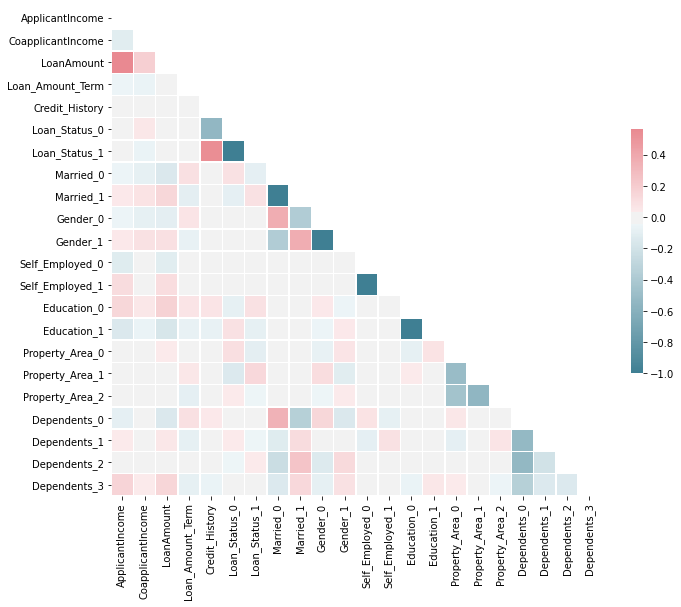

In [48]:
mask = np.zeros_like(a, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(a, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

**Problem 4.4 - Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)**

**Variables That Have Strong Correlations Using OHE Are:-**
- (LoanAmount , ApplicantIncome)
- (Loan_Status_1 , Credit_History)
- (Dependents_0 , Married_0)
- (Gender_0 , Married_0)
- (Gender_1 , Married_1)
- (Dependents2 , Married_1)